In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from collections import Counter
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


encoder = preprocessing.LabelEncoder()

#data = pd.read_excel("indian liver.xlsx")
data = pd.read_csv("../data/raw_data/indian_liver_patient.csv")

In [3]:
categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['Gender']

In [2]:
data['Albumin_and_Globulin_Ratio'] = encoder.fit_transform(data['Albumin_and_Globulin_Ratio'].astype(str))
data['Total_Bilirubin'] = encoder.fit_transform(data['Total_Bilirubin'].astype(str))
data['Albumin'] = encoder.fit_transform(data['Albumin'].astype(str))
data['Direct_Bilirubin'] = encoder.fit_transform(data['Direct_Bilirubin'].astype(str))
data['Total_Protiens'] = encoder.fit_transform(data['Total_Protiens'].astype(str))
data['Gender'] = encoder.fit_transform(data['Gender'].astype(str))

In [ ]:
data

In [3]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns


['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [4]:
# duplicated rows

data.duplicated().sum()

duplicate = data[data.duplicated()]
  
print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,0,5,2,293,232,245,34,19,27,1
26,34,1,81,36,289,875,731,16,15,42,1
34,38,0,50,11,410,59,57,22,18,27,2
55,42,1,111,56,272,31,61,24,8,9,1
62,58,1,6,4,158,37,43,38,24,37,1
106,36,1,90,39,145,32,92,17,14,37,2
108,36,1,4,1,158,29,39,26,10,9,2
138,18,1,4,1,282,72,140,21,13,27,1
143,30,1,12,3,332,84,139,22,15,31,1
158,72,1,3,0,196,20,35,24,8,9,1


In [5]:
data.duplicated().sum()

13

In [6]:
# Remove duplicated rows

data.drop_duplicates(keep=False, inplace=True)
data.duplicated().sum()

0

In [7]:
data.shape
data.Dataset.value_counts()

Dataset
1    396
2    161
Name: count, dtype: int64

In [8]:
unique_values = data['Dataset'].unique()
print("Unique values in 'Dataset':", unique_values)


Unique values in 'Dataset': [1 2]


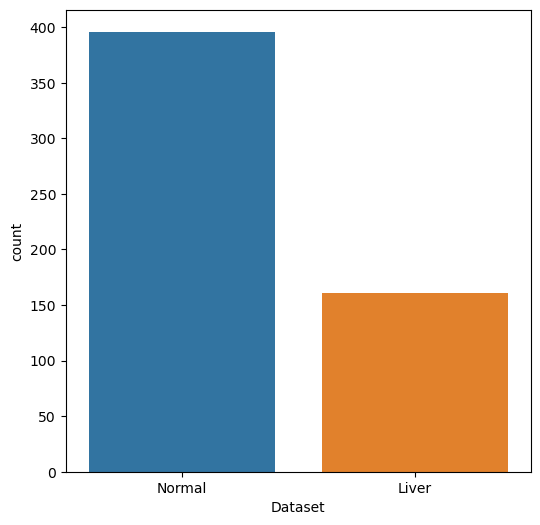

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Plot the number of 1's and 2's
g = sns.countplot(x='Dataset', data=data)

# Set x-axis labels for the two categories
g.set_xticklabels(['Normal', 'Liver'])

plt.show()


In [10]:
#data preparation
y = data["Dataset"]
X = data.drop(["Dataset"],axis=1)


X.isna().sum()
X.isna().sum().sum()

0

In [11]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN

# build model with SMOTE imblearn
# smote_pipeline = make_pipeline_imb(SMOTE(random_state=0))

smote_pipeline = RandomOverSampler(random_state=0)

# smote_pipeline = ADASYN(random_state=0, n_neighbors=4)
smote_model = smote_pipeline.fit(X, y)

# Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))

X_smote, y_smote = smote_model.fit_resample(X, y)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({1: 396, 2: 161})
SMOTE data distribution: Counter({1: 396, 2: 396})


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier


# rfe = RFE(estimator=RandomForestClassifier(random_state=24)) #, n_features_to_select=8

# rfe = rfe.fit(X_smote, y_smote)

# f = rfe.get_support() #the most important features
# X_new = X[X.columns[f]] # final features`
# print("Optimal number of features : %d" % rfe.n_features_)

# features = X.columns[rfe.get_support()]
# features

Feature Count: 8
Selected features based on correlation threshold: ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio']


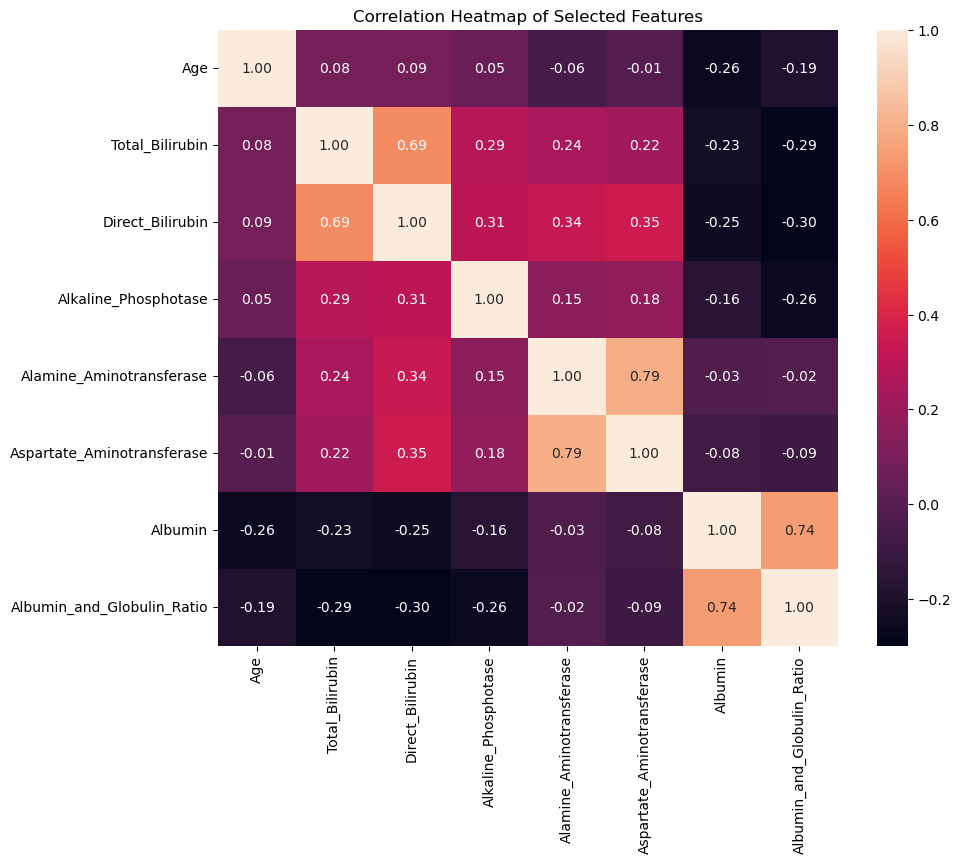

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of each feature in X_smote with y_smote
correlations_with_target = X_smote.apply(lambda x: x.corr(y_smote))

# Select features based on a correlation threshold
threshold = 0.1
features_above_threshold = correlations_with_target[abs(correlations_with_target) > threshold].index.tolist()

# Create the final dataset with the selected features
X_new = X_smote[features_above_threshold]
print("Feature Count:", X_new.shape[1])
print("Selected features based on correlation threshold:", features_above_threshold)

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(X_smote[features_above_threshold].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()


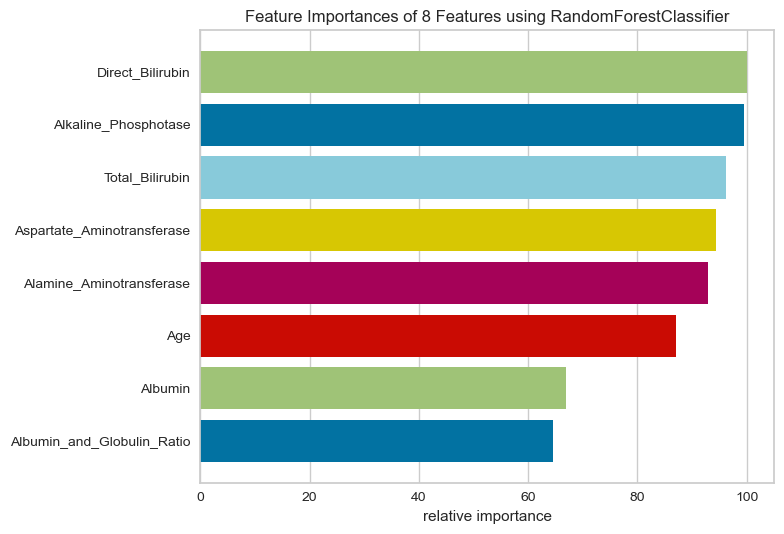

<Axes: title={'center': 'Feature Importances of 8 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [13]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X_new, y_smote)
viz.show()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define base models for the stacking classifier
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=22)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=22)),
    # ('svc', SVC(probability=True, random_state=22)),
    # ('knn', KNeighborsClassifier()),
    # ('dt', DecisionTreeClassifier(random_state=22))
    ('ET', ExtraTreesClassifier(n_estimators=120, random_state=22)),
    
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier with cross-validation
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
)

# Train and evaluate the stacking model using the resampled data
accuracy_scores = []
for train_index, test_index in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_new, y_smote):
    X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
    y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]

    stacking_model.fit(X_train, y_train)
    y_pred = stacking_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")


Average Accuracy: 0.9104


# Evaluation Metrics

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for train_index, test_index in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_new, y_smote):
    X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
    y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]

    stacking_model.fit(X_train, y_train)
    y_pred = stacking_model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))

# Calculate and print the average scores across folds
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
print(f"Average ROC-AUC Score: {np.mean(roc_auc_scores):.4f}")


Average Accuracy: 0.9104
Average Precision: 0.8932
Average Recall: 0.9346
Average F1 Score: 0.9129
Average ROC-AUC Score: 0.9104


# Testing the Algorithms alone

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_smote, test_size=0.25, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=22)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print results
print(f'RandomForestClassifier - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, ROC-AUC: {roc_auc_rf}')


RandomForestClassifier - Accuracy: 0.8282828282828283, Precision: 0.9146341463414634, Recall: 0.7352941176470589, F1 Score: 0.8152173913043479, ROC-AUC: 0.8311887254901962


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=22)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Calculate metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

# Print results
print(f'GradientBoostingClassifier - Accuracy: {accuracy_gb}, Precision: {precision_gb}, Recall: {recall_gb}, F1 Score: {f1_gb}, ROC-AUC: {roc_auc_gb}')


GradientBoostingClassifier - Accuracy: 0.7878787878787878, Precision: 0.8658536585365854, Recall: 0.696078431372549, F1 Score: 0.7717391304347825, ROC-AUC: 0.7907475490196079


In [18]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(n_estimators=120, random_state=22)

# Train the classifier
et_classifier.fit(X_train, y_train)

# Make predictions
y_pred_et = et_classifier.predict(X_test)

# Calculate metrics
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et)
recall_et = recall_score(y_test, y_pred_et)
f1_et = f1_score(y_test, y_pred_et)
roc_auc_et = roc_auc_score(y_test, y_pred_et)

# Print results
print(f'ExtraTreesClassifier - Accuracy: {accuracy_et}, Precision: {precision_et}, Recall: {recall_et}, F1 Score: {f1_et}, ROC-AUC: {roc_auc_et}')


ExtraTreesClassifier - Accuracy: 0.8535353535353535, Precision: 0.9101123595505618, Recall: 0.7941176470588235, F1 Score: 0.8481675392670156, ROC-AUC: 0.8553921568627451
